# 2.2a)

##  Implementation of Grid Space as an Environment in Gymnasium.

In [15]:
import gymnasium as gym
import numpy as np
from gymnasium import spaces

class GridWorldEnv(gym.Env):
    def __init__(self, grid_size=5):
        super(GridWorldEnv, self).__init__()
        
        self.grid_size = grid_size
        self.grid = np.zeros((grid_size, grid_size))
        self.agent_position = (0, 0)
        
        # Define action space
        self.action_space = spaces.Discrete(4)  # 0: south, 1: north, 2: east, 3: west
        
        # Define observation space
        self.observation_space = spaces.Box(low=0, high=4, shape=(2,), dtype=np.int32)
        
        self.reward = 0
        self.done = False

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.agent_position = (0, 0)
        self.reward = 0
        self.done = False

        observation = np.array(self.agent_position, dtype=np.int32)

        # Docs say to return additional info here, but i dont think we have any
        info = {}

        return observation, info

    def step(self, action):
        # Map action to direction
        action_map = {0: "south", 1: "north", 2: "east", 3: "west"}
        direction = action_map[action]
        
        # Update agent position based on action
        if direction == "south":
            new_position = (self.agent_position[0] + 1, self.agent_position[1])
        elif direction == "north":
            new_position = (self.agent_position[0] - 1, self.agent_position[1])
        elif direction == "east":
            new_position = (self.agent_position[0], self.agent_position[1] + 1)
        elif direction == "west":
            new_position = (self.agent_position[0], self.agent_position[1] - 1)
        
        # Check for out of bounds
        if new_position[0] < 0 or new_position[0] > 4 or new_position[1] < 0 or new_position[1] > 4:    
            new_position = (
                max(0, min(new_position[0], 4)),
                max(0, min(new_position[1], 4))
            )
            self.reward = -1

        # Handle special states
        elif new_position == (0, 1):
            new_position = (4, 1) 
            self.reward = 10

        elif new_position == (0, 3):
            new_position = (2, 3)
            self.reward = 5

        # If no special state, reward = 0
        else:
            self.reward = 0

        # Update agent position
        self.agent_position = new_position
        
        # Check if the episode is done
        # How do we define an episode? We dont need to define it currently imo, but will be useful in the future
        self.done = False  
        
        observation = np.array(self.agent_position, dtype=np.int32)
        info = {}

        return observation, self.reward, self.done, False, info

    def render(self, mode='human'):
        """useless function lol?"""
        if mode == 'human':
            print(self.grid)
            print(f"Agent position: {self.agent_position}")
            print(f"Reward: {self.reward}")

    def close(self):
        pass

# 2.2b) 

## Testing the implementation


In [16]:
from gymnasium.envs.registration import register

register(
    id='GridSpace-v0',
    entry_point='__main__:GridWorldEnv',
    max_episode_steps=100,
)

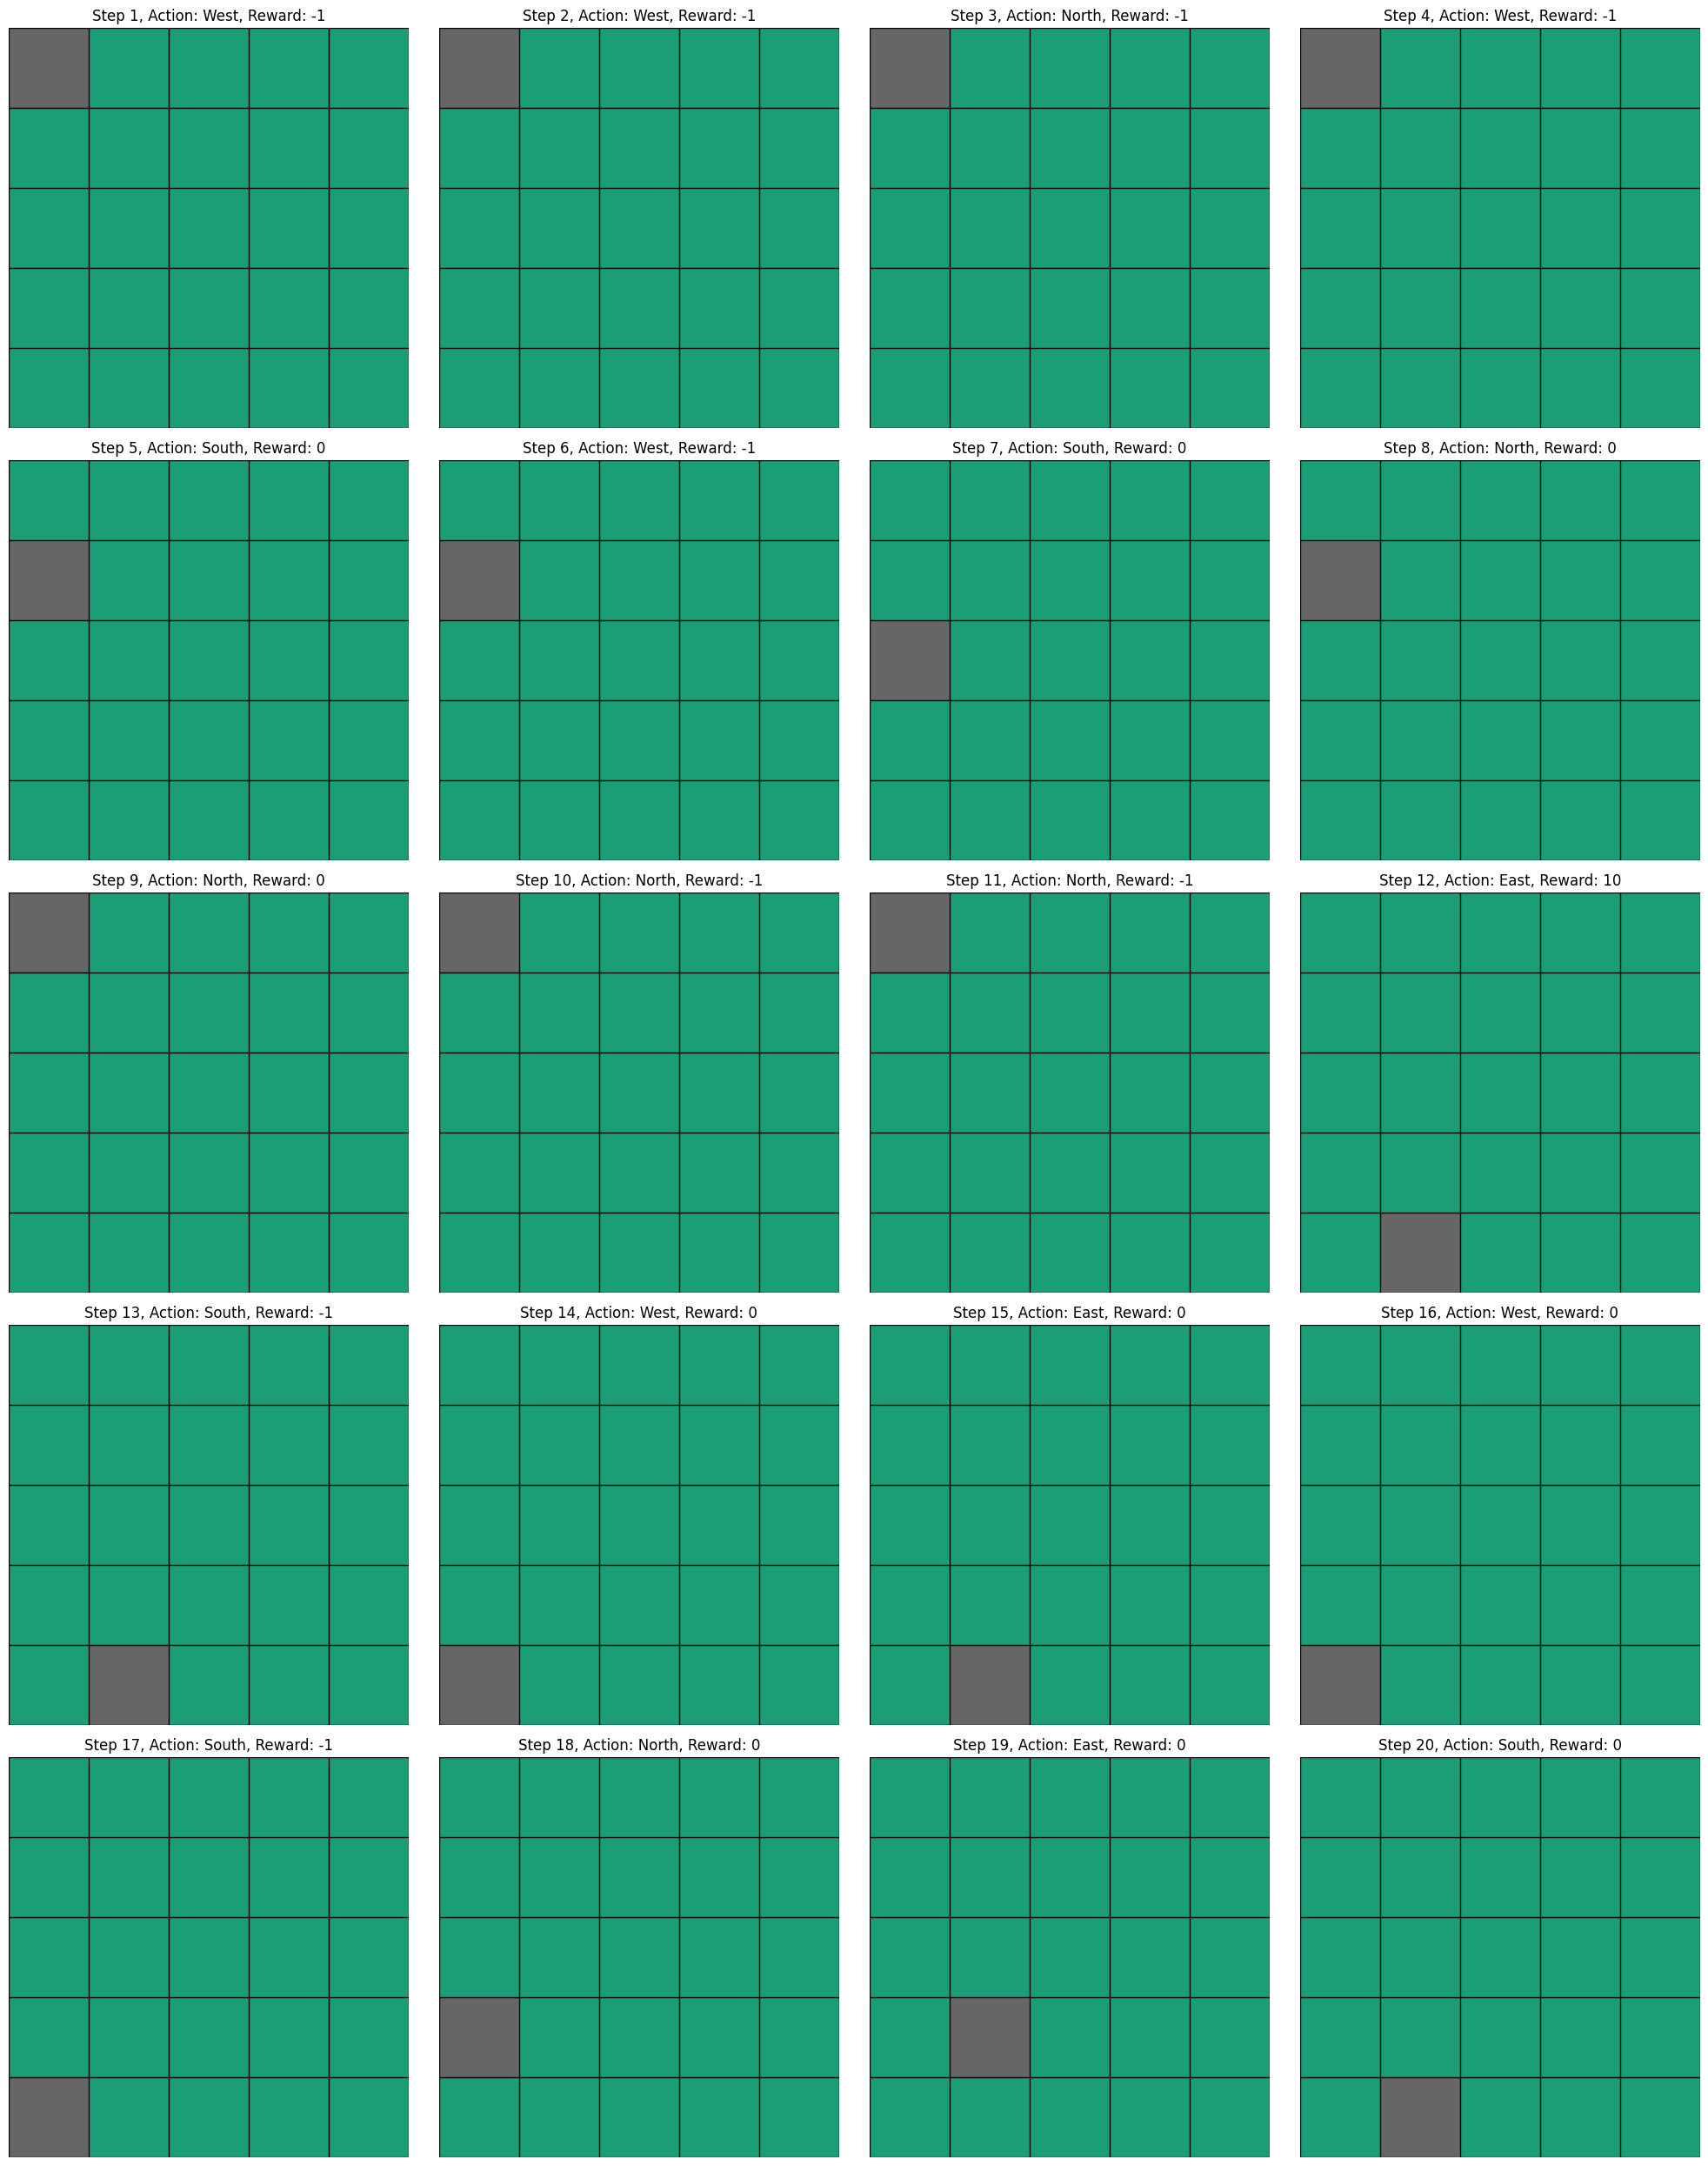

In [21]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

# Create the environment
env = gym.make('GridSpace-v0')

# Initialize the environment
observation, info = env.reset()

# Create a figure to display the grid
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.flatten()

# Simulate 20 steps
for i in range(20):
    # Sample a random action
    action = env.action_space.sample()
    
    # Take a step in the environment
    observation, reward, terminated, truncated, info = env.step(action)
    
    # Create a grid representation
    grid = np.ones((5, 5)) * 0.8  # Light gray background
    grid[observation[0], observation[1]] = 0  # Black for agent position
    
    if action == 0:
        action_for_plot = "South"
    elif action == 1:
        action_for_plot = "North"
    elif action == 2:
        action_for_plot = "East"
    elif action == 3:
        action_for_plot = "West"
    # Plot the grid
    axes[i].imshow(grid, cmap='Dark2_r')
    axes[i].set_title(f'Step {i+1}, Action: {action_for_plot}, Reward: {reward}')
    axes[i].axis('off')
    
    # Add grid lines
    for x in range(6):
        axes[i].axhline(y=x - 0.5, color='black', linewidth=1)
        axes[i].axvline(x=x - 0.5, color='black', linewidth=1)
    
    if terminated or truncated:
        observation, info = env.reset()

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()

# Close the environment
env.close()